In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Constants

In [17]:
first_cols = ['cardNum', 'boarding_datetime','gps_datetime','route','busCode','stopPointId']
boarding_key_cols = ['cardNum','boarding_datetime']
gps_key_cols = ['route','busCode','tripNum','stopPointId']
max_match_diff = 1500

### Code

#### Reading BUSTE data

In [3]:
buste_data = pd.read_csv('/local/tarciso/masters/data/bus_trips/test/part-00000-buste-latest', dtype = {'route': str}, na_values='-')

In [4]:
buste_data.head()

,route,tripNum,shapeId,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,...,distanceToShapePoint,timestamp,stopPointId,problem,birthdate,cardTimestamp,lineName,cardNum,gender,date
0,372,4.0,1891,6136674,-25.418008,-49.201094,985.183,CC170,NaN,NaN,...,NaN,12:00:03,30778,BETWEEN,NaN,NaN,NaN,NaN,NaN,2017_05_09
1,372,4.0,1891,6136668,-25.416008,-49.202063,743.173,CC170,NaN,NaN,...,NaN,12:00:52,30767,BETWEEN,NaN,NaN,NaN,NaN,NaN,2017_05_09
2,372,4.0,1891,6136658,-25.413175,-49.203970,326.247,CC170,NaN,NaN,...,NaN,12:02:16,30760,BETWEEN,NaN,NaN,NaN,NaN,NaN,2017_05_09
3,372,4.0,1891,6136644,-25.412986,-49.205264,0.000,CC170,NaN,-25.413055,...,11.568364,12:03:22,26210,NO_PROBLEM,NaN,NaN,NaN,NaN,NaN,2017_05_09
4,372,5.0,1891,6136658,-25.413175,-49.203970,326.247,CC170,NaN,-25.413151,...,24.480747,12:04:49,30760,NO_PROBLEM,NaN,NaN,NaN,NaN,NaN,2017_05_09


In [5]:
buste_data.dtypes

route                     object
tripNum                  float64
shapeId                    int64
shapeSequence              int64
shapeLat                 float64
shapeLon                 float64
distanceTraveledShape    float64
busCode                   object
gpsPointId               float64
gpsLat                   float64
gpsLon                   float64
distanceToShapePoint     float64
timestamp                 object
stopPointId                int64
problem                   object
birthdate                 object
cardTimestamp             object
lineName                  object
cardNum                  float64
gender                    object
date                      object
dtype: object

#### Add date and datetime to gps dataframe

In [6]:
buste_data['gps_datetime'] = pd.to_datetime(buste_data['date'] + ' ' + buste_data['timestamp'],format='%Y_%m_%d %H:%M:%S')
buste_data['boarding_datetime'] = pd.to_datetime(buste_data['date'] + ' ' + buste_data['cardTimestamp'],format='%Y_%m_%d %H:%M:%S')

In [7]:
buste_data[['date','gps_datetime','boarding_datetime']]

,date,gps_datetime,boarding_datetime
0,2017_05_09,2017-05-09 12:00:03,NaT
1,2017_05_09,2017-05-09 12:00:52,NaT
2,2017_05_09,2017-05-09 12:02:16,NaT
3,2017_05_09,2017-05-09 12:03:22,NaT
4,2017_05_09,2017-05-09 12:04:49,NaT
5,2017_05_09,2017-05-09 12:05:40,NaT
6,2017_05_09,2017-05-09 12:06:23,NaT
7,2017_05_09,2017-05-09 12:06:46,NaT
8,2017_05_09,2017-05-09 12:07:36,2017-05-09 12:08:28
9,2017_05_09,2017-05-09 12:09:23,NaT


In [99]:
other_cols = [col for col in buste_data.columns if col not in first_cols]
cols_order = first_cols + other_cols
gps_by_boarding = buste_data[cols_order] \
    .sort_values(boarding_key_cols)
gps_by_boarding.head(10)

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLat,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-25.498735,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-25.501313,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-25.450986,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-25.428210,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09
616108,304627.0,2017-05-09 14:17:23,2017-05-09 14:16:09,370,BC032,3377,6.0,2789,5510110,-25.428214,...,-25.428125,-49.246675,18.124441,14:16:09,NO_PROBLEM,05/04/53,14:17:23,RUA XV / BARIGUI,F,2017_05_09
376450,304627.0,2017-05-09 16:24:40,2017-05-09 15:45:37,370,LC020,30303,6.0,2789,5510843,-25.455839,...,-25.455803,-49.323013,5.475631,15:45:37,NO_PROBLEM,05/04/53,16:24:40,RUA XV / BARIGUI,F,2017_05_09
392872,306135.0,2017-05-09 07:56:49,2017-05-09 07:56:48,777,JC004,32097,3.0,2194,4299781,-25.446370,...,-25.446305,-49.275308,32.238018,07:56:48,NO_PROBLEM,29/10/52,07:56:49,V. VELHA,M,2017_05_09
564838,310241.0,2017-05-09 17:55:48,2017-05-09 17:55:42,468,DC090,30884,5.0,1926,4418132,-25.455683,...,-25.455618,-49.241156,8.323350,17:55:42,NO_PROBLEM,13/01/72,17:55:48,JD. ITIBERÊ,M,2017_05_09
214350,312500.0,2017-05-09 13:26:11,2017-05-09 13:24:48,175,BC282,28632,6.0,2743,5404932,-25.431576,...,-25.431573,-49.271680,6.383659,13:24:48,NO_PROBLEM,26/02/82,13:26:11,BOM RETIRO / PUC,F,2017_05_09


In [102]:
len(gps_by_boarding)

642639

#### Filtering out BUSTE entries whose GPS-Ticketing match time difference is higher than 30 minutes

In [103]:
gps_by_boarding['match_diff'] = (gps_by_boarding['boarding_datetime'] - gps_by_boarding['gps_datetime']).astype('timedelta64[s]')

In [104]:
gps_by_boarding_filtered = gps_by_boarding[np.abs(gps_by_boarding['match_diff']) <= max_match_diff]
gps_by_boarding_filtered

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09,20.0
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09,67.0
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09,51.0
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09,142.0
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09,918.0
616108,304627.0,2017-05-09 14:17:23,2017-05-09 14:16:09,370,BC032,3377,6.0,2789,5510110,-25.428214,...,-49.246675,18.124441,14:16:09,NO_PROBLEM,05/04/53,14:17:23,RUA XV / BARIGUI,F,2017_05_09,74.0
392872,306135.0,2017-05-09 07:56:49,2017-05-09 07:56:48,777,JC004,32097,3.0,2194,4299781,-25.446370,...,-49.275308,32.238018,07:56:48,NO_PROBLEM,29/10/52,07:56:49,V. VELHA,M,2017_05_09,1.0
564838,310241.0,2017-05-09 17:55:48,2017-05-09 17:55:42,468,DC090,30884,5.0,1926,4418132,-25.455683,...,-49.241156,8.323350,17:55:42,NO_PROBLEM,13/01/72,17:55:48,JD. ITIBERÊ,M,2017_05_09,6.0
214350,312500.0,2017-05-09 13:26:11,2017-05-09 13:24:48,175,BC282,28632,6.0,2743,5404932,-25.431576,...,-49.271680,6.383659,13:24:48,NO_PROBLEM,26/02/82,13:26:11,BOM RETIRO / PUC,F,2017_05_09,83.0
285119,312823.0,2017-05-09 13:35:49,2017-05-09 13:34:57,652,LA001,34977,13.0,2101,3834325,-25.534607,...,-49.331276,14.430964,13:34:57,NO_PROBLEM,03/09/88,13:35:49,V. VERDE,F,2017_05_09,52.0


In [51]:
print gps_by_boarding_filtered['match_diff'].describe()

count    139531.000000
mean         83.926755
std         163.364311
min       -1313.000000
25%          17.000000
50%          48.000000
75%          69.000000
max        1499.000000
Name: match_diff, dtype: float64


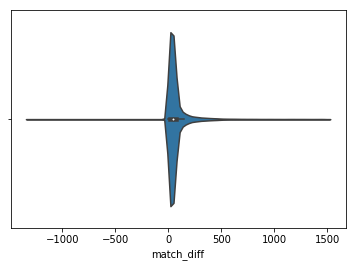

In [12]:
sns.violinplot(x='match_diff', data=gps_by_boarding_filtered[(gps_by_boarding_filtered['match_diff'] > -max_match_diff) & (gps_by_boarding_filtered['match_diff'] < max_match_diff)])

In [13]:
num_single_boardings = len(gps_by_boarding.drop_duplicates(subset=boarding_key_cols))
num_matched_boardings = len(gps_by_boarding_filtered)
num_missed_boardings = num_single_boardings - num_matched_boardings
perc_matched_boardings = num_matched_boardings/float(num_single_boardings)
perc_missed_boardings = num_missed_boardings/float(num_single_boardings)
print "single boardings: {}, matched boardings: {} ({}), missed boardings = {} ({})".format(num_single_boardings, num_matched_boardings, perc_matched_boardings, num_missed_boardings, perc_missed_boardings)

single boardings: 144668, matched boardings: 139531 (0.964491110681), missed boardings = 5137 (0.035508889319)


In [14]:
trips_per_user = gps_by_boarding_filtered.groupby(['cardNum']).cardNum.count().reset_index(name='num_trips').num_trips.value_counts(normalize=True) \
                    .reset_index(name='num_trips', level=0)

In [15]:
trips_per_user

,index,num_trips
0,1,0.751818
1,2,0.208254
2,3,0.028545
3,4,0.009244
4,5,0.001270
5,6,0.000654
6,7,0.000112
7,8,0.000065
8,10,0.000019
9,9,0.000019


### Build final BUSTE dataset

#### Ticketing and GPS matches

In [18]:
gps_by_boarding_filtered.head()

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09,20.0
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09,67.0
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09,51.0
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09,142.0
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09,918.0


In [39]:
len(gps_by_boarding_filtered)

139531

In [125]:
len(gps_by_boarding_filtered[pd.isnull(gps_by_boarding_filtered['cardNum']) | pd.isnull(gps_by_boarding_filtered['boarding_datetime'])])

0

In [128]:
len(gps_by_boarding_filtered[pd.isnull(gps_by_boarding_filtered['route']) | 
             pd.isnull(gps_by_boarding_filtered['busCode']) |
             pd.isnull(gps_by_boarding_filtered['tripNum']) |
             pd.isnull(gps_by_boarding_filtered['stopPointId']) |
             pd.isnull(gps_by_boarding_filtered['gps_datetime'])])

0

In [37]:
gps_by_boarding_filtered[pd.isnull(gps_by_boarding_filtered['cardNum'])]

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff


#### GPS with no match / with filtered match

In [142]:
gps_with_no_match = gps_by_boarding[(np.abs(gps_by_boarding['match_diff']) > max_match_diff) | (pd.isnull(gps_by_boarding['match_diff']))]
gps_with_no_match.loc[:,['cardNum','boarding_datetime','birthdate','cardTimestamp','lineName','gender']] = np.nan

In [143]:
gps_with_no_match

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
376450,NaN,NaN,2017-05-09 15:45:37,370,LC020,30303,6.0,2789,5510843,-25.455839,...,-49.323013,5.475631,15:45:37,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2343.0
510050,NaN,NaN,2017-05-09 12:58:40,631,GA208,33278,8.0,3369,6595274,-25.512413,...,-49.289261,3.034185,12:58:40,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,-26708.0
271115,NaN,NaN,2017-05-09 13:47:36,370,LC028,30304,5.0,2789,5510857,-25.458703,...,-49.323503,2.649607,13:47:36,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2200.0
391172,NaN,NaN,2017-05-09 12:59:59,040,HB605,34156,3.0,1718,3368987,-25.404344,...,-49.335390,10.035853,12:59:59,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,-23867.0
128240,NaN,NaN,2017-05-09 06:51:17,021,HB604,28136,1.0,3235,5233298,-25.435866,...,-49.307076,20.858232,06:51:17,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,1726.0
542840,NaN,NaN,2017-05-09 07:55:32,010,BB310,33171,2.0,1708,5859650,-25.449428,...,-49.254205,8.176641,07:55:32,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2526.0
391175,NaN,NaN,2017-05-09 12:59:59,040,HB605,34156,3.0,1718,3368987,-25.404344,...,-49.335390,10.035853,12:59:59,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,-25520.0
613942,NaN,NaN,2017-05-09 08:15:39,010,BB001,33171,3.0,1708,5859650,-25.449428,...,-49.254193,6.699659,08:15:39,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2518.0
613941,NaN,NaN,2017-05-09 08:15:39,010,BB001,33171,3.0,1708,5859650,-25.449428,...,-49.254193,6.699659,08:15:39,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,2524.0
341510,NaN,NaN,2017-05-09 16:25:38,040,MB301,31029,8.0,1717,3367323,-25.513207,...,-49.295160,3.268860,16:25:38,NO_PROBLEM,NaN,NaN,NaN,NaN,2017_05_09,3622.0


In [144]:
gps_with_no_match = gps_with_no_match[
                (pd.notnull(gps_with_no_match['route']) & pd.notnull(gps_with_no_match['busCode'])) &
                (pd.notnull(gps_with_no_match['tripNum']) & pd.notnull(gps_with_no_match['stopPointId'])) &
                (pd.notnull(gps_with_no_match['gps_datetime']))] \
                    .drop_duplicates(subset=gps_key_cols)

In [145]:
len(gps_with_no_match)

471707

#### Building dataset with unique GPS-Ticketing matches and unique GPS records

In [146]:
unique_boarding_gps = pd.concat([gps_by_boarding_filtered,gps_with_no_match])

In [147]:
len(unique_boarding_gps)

611238

In [156]:
unique_boarding_gps = unique_boarding_gps[~((unique_boarding_gps.duplicated(subset=gps_key_cols, keep=False)) & (pd.isnull(unique_boarding_gps['cardNum'])))] \
            .sort_values(boarding_key_cols + gps_key_cols[:-1] + ['gps_datetime'])

In [157]:
unique_boarding_gps

,cardNum,boarding_datetime,gps_datetime,route,busCode,stopPointId,tripNum,shapeId,shapeSequence,shapeLat,...,gpsLon,distanceToShapePoint,timestamp,problem,birthdate,cardTimestamp,lineName,gender,date,match_diff
603844,229948.0,2017-05-09 06:29:09,2017-05-09 06:28:49,654,HA017,35350,2.0,2953,3848651,-25.492612,...,NaN,NaN,06:28:49,BETWEEN,28/04/95,06:29:09,CAMPO ALEGRE,F,2017_05_09,20.0
631023,257342.0,2017-05-09 07:48:58,2017-05-09 07:47:51,511,EA172,31195,4.0,2746,5846156,-25.498727,...,-49.247771,9.667548,07:47:51,NO_PROBLEM,24/01/71,07:48:58,SÃO FRANCISCO,F,2017_05_09,67.0
268418,300327.0,2017-05-09 06:56:45,2017-05-09 06:55:54,654,HA240,36094,3.0,2106,6040871,-25.501307,...,-49.319971,0.737270,06:55:54,NO_PROBLEM,20/05/59,06:56:45,OP. CONTIGENCIA,F,2017_05_09,51.0
546103,304127.0,2017-05-09 10:24:50,2017-05-09 10:22:28,175,BC010,31748,5.0,1743,5444496,-25.450869,...,-49.254015,13.270845,10:22:28,NO_PROBLEM,09/06/54,10:24:50,BOM RETIRO / PUC,M,2017_05_09,142.0
334650,304127.0,2017-05-09 10:57:36,2017-05-09 10:42:18,370,LC016,3377,3.0,3669,6592154,-25.428220,...,-49.246896,5.426374,10:42:18,NO_PROBLEM,09/06/54,10:57:36,RUA XV / BARIGUI,M,2017_05_09,918.0
616108,304627.0,2017-05-09 14:17:23,2017-05-09 14:16:09,370,BC032,3377,6.0,2789,5510110,-25.428214,...,-49.246675,18.124441,14:16:09,NO_PROBLEM,05/04/53,14:17:23,RUA XV / BARIGUI,F,2017_05_09,74.0
392872,306135.0,2017-05-09 07:56:49,2017-05-09 07:56:48,777,JC004,32097,3.0,2194,4299781,-25.446370,...,-49.275308,32.238018,07:56:48,NO_PROBLEM,29/10/52,07:56:49,V. VELHA,M,2017_05_09,1.0
564838,310241.0,2017-05-09 17:55:48,2017-05-09 17:55:42,468,DC090,30884,5.0,1926,4418132,-25.455683,...,-49.241156,8.323350,17:55:42,NO_PROBLEM,13/01/72,17:55:48,JD. ITIBERÊ,M,2017_05_09,6.0
214350,312500.0,2017-05-09 13:26:11,2017-05-09 13:24:48,175,BC282,28632,6.0,2743,5404932,-25.431576,...,-49.271680,6.383659,13:24:48,NO_PROBLEM,26/02/82,13:26:11,BOM RETIRO / PUC,F,2017_05_09,83.0
285119,312823.0,2017-05-09 13:35:49,2017-05-09 13:34:57,652,LA001,34977,13.0,2101,3834325,-25.534607,...,-49.331276,14.430964,13:34:57,NO_PROBLEM,03/09/88,13:35:49,V. VERDE,F,2017_05_09,52.0


In [153]:
len(unique_boarding_gps)

609960